In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('CreditScoring.csv')

In [3]:
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [62]:
data['Job'].unique()

array([3, 1, 2, 0, 4], dtype=int64)

In [4]:
data['Status'].unique()

array([1, 2, 0], dtype=int64)

In [5]:
data[data['Status']==0]

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
3309,0,10,3,60,25,1,1,1,35,148,3000,0,1500,1888


In [6]:
data = data[data['Status']!=0]

In [7]:
X, y = data.drop('Status', 1), data['Status'] 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

In [30]:
from sklearn.metrics import accuracy_score
print('Decision tree accuracy: %.2f%%' % (100 * accuracy_score(clf.predict(X_test), y_test)))

Decision tree accuracy: 71.28%


In [22]:
y_train[y_train==2] = 0
y_test[y_test==2] = 0

In [54]:
clf = DecisionTreeClassifier()

from sklearn.grid_search import GridSearchCV
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5, 10)),
    'max_features': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.0],
    'min_samples_leaf': list(range(3, 20))
}
gs = GridSearchCV(clf, params_grid, scoring='f1', verbose=1) # хороший скоринг f1 или roc_auc, т.к. важен баланс между ошибками 1 и 2 рода
gs.fit(X_train, y_train)

clf = gs.best_estimator_

Fitting 3 folds for each of 1190 candidates, totalling 3570 fits


[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   19.0s finished


In [55]:
print('Decision tree accuracy: %.2f%%' % (100 * accuracy_score(clf.predict(X_test), y_test)))

Decision tree accuracy: 76.81%


ROC AUC: 0.775679


Text(0,0.5,'Threshold')

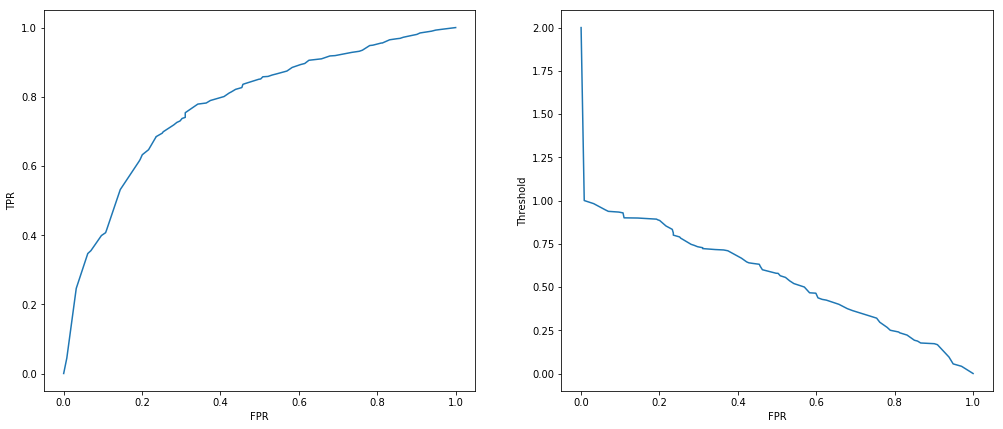

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % roc_auc)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(17,7))
plt.subplot(121)
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR');
plt.subplot(122)
plt.plot(fpr, thresholds)
plt.xlabel('FPR')
plt.ylabel('Threshold')

In [46]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
# не будем ограничивать максимальную глубину

clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

clf = clf.fit(X_train, y_train)

In [48]:
print('Decision tree accuracy: %.2f%%' % (100 * accuracy_score(clf.predict(X_test), y_test)))

Decision tree accuracy: 75.54%


In [49]:
# не переобучилось почему-то, если не задавать максимальную глубину

In [50]:
# увеличим min_samples_leaf, min_samples_split
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

clf = clf.fit(X_train, y_train)
print('Decision tree accuracy: %.2f%%' % (100 * accuracy_score(clf.predict(X_test), y_test)))

Decision tree accuracy: 74.64%


In [51]:
# стало чуть похуже (но точность скачет от запуска к запуску)

In [56]:
gs.fit(X_train, y_train)
clf = gs.best_estimator_
print('Decision tree accuracy: %.2f%%' % (100 * accuracy_score(clf.predict(X_test), y_test)))

Decision tree accuracy: 76.81%


In [57]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='./tree.dot', filled=True, feature_names=X.columns)

In [63]:
# дерево достаточно осмысленное, в первых правилах доход, работа, объем кредита